# TOC
PREP    
Importing libraries and data
Data prep for time series analysis
   
DATA SMOOTHING   
Data smoothing & analysis   

DECOMPOSITION   
Decomposition graphing & analysis 

STATIONARITY   
Plotting rolling statistics & observations   
Conducting Dickey-Fuller test & observations   
Autocorrelation & observations   
Setting up differenced dataset; re-running stationarity steps & analysis

### PREP

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
plt.style.use('bmh')

In [4]:
# Importing data

path = r'C:\Users\Ryzen RGB Madness!!!\Iowa Liquor Sales Analysis'

In [5]:
liquor_data_complete = pd.read_pickle(os.path.join(path, '01 - Data', 'Cleaned', 'iowa_sales_location_population.pkl'))

In [6]:
liquor_data_complete.shape

(12537543, 26)

In [7]:
liquor_data_complete.columns

Index(['invoice_number', 'date', 'store_number', 'store_name', 'address',
       'city', 'zip_code', 'latitude', 'longitude', 'county_fips', 'county',
       'population', 'category', 'category_name', 'vendor_number',
       'vendor_name', 'item_number', 'item_description', 'pack',
       'bottle_volume_ml', 'state_bottle_cost', 'state_bottle_retail',
       'bottles_sold', 'sale_dollars', 'volume_sold_liters',
       'volume_sold_gallons'],
      dtype='object')

In [8]:
# Data prep - setting date as index column

liquor_data_timedata = liquor_data_complete.set_index('date')

In [9]:
liquor_data_timedata.head()

,invoice_number,store_number,store_name,address,city,zip_code,latitude,longitude,county_fips,county,...,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
date,,,,,,,,,,,,,,,,,,,,,
2018-09-04,INV-14210900001,4617,LICKETY LIQUOR,2501 HUBBELL AVE,DES MOINES,50317,41.607739,-93.570182,19153,Polk,...,36904,MCCORMICK VODKA PET,24,375,1.80,2.70,48,129.60,18.0,4.75
2019-01-08,INV-16812800013,5151,IDA LIQUOR,500 HWY 175,IDA GROVE,51445,42.350164,-95.489235,19093,Ida,...,38176,TITOS HANDMADE VODKA,12,750,9.64,14.46,12,173.52,9.0,2.37
2019-03-12,INV-18087600031,5151,IDA LIQUOR,500 HWY 175,IDA GROVE,51445,42.350164,-95.489235,19093,Ida,...,27102,TEMPLETON 4YR RYE,6,750,18.09,27.14,6,162.84,4.5,1.18
2018-10-23,INV-15226900023,5151,IDA LIQUOR,500 HWY 175,IDA GROVE,51445,42.350164,-95.489235,19093,Ida,...,35918,FIVE O'CLOCK VODKA,6,1750,7.20,10.80,6,64.80,10.5,2.77
2019-02-01,INV-17301000008,2445,RUBACK'S FOOD CENTER,504 SOUTH HIGHWAY,OAKLAND,51560,41.309302,-95.396649,19155,Pottawattamie,...,36306,HAWKEYE VODKA,12,750,3.34,5.01,12,60.12,9.0,2.37


In [10]:
import matplotlib.dates as mdates

In [11]:
%matplotlib inline

In [12]:
# Removing unnecessary columns for checking stationarity

liquor_data_td_dollars = liquor_data_timedata.drop(columns =['invoice_number', 'store_number', 'store_name', 'address', 'city',
       'zip_code', 'latitude', 'longitude', 'county_fips', 'county',
       'population', 'category', 'category_name', 'vendor_number',
       'vendor_name', 'item_number', 'item_description', 'pack',
       'bottle_volume_ml', 'state_bottle_cost', 'state_bottle_retail',
       'bottles_sold', 'volume_sold_liters',
       'volume_sold_gallons'])

In [13]:
liquor_data_td_dollars.head()

,sale_dollars
date,
2018-09-04,129.60
2019-01-08,173.52
2019-03-12,162.84
2018-10-23,64.80
2019-02-01,60.12


In [14]:
liquor_data_td_dollars.shape

(12537543, 1)

In [15]:
liquor_data_grouped_day = liquor_data_td_dollars.groupby([(liquor_data_td_dollars.index)]).sum()

In [16]:
liquor_data_grouped_day.head()

,sale_dollars
date,
2018-01-02,971601.54
2018-01-03,1203749.02
2018-01-04,1124619.32
2018-01-05,551381.03
2018-01-08,1621213.23


In [17]:
liquor_data_grouped_day.shape

(1390, 1)

In [18]:
import matplotlib.ticker as ticker

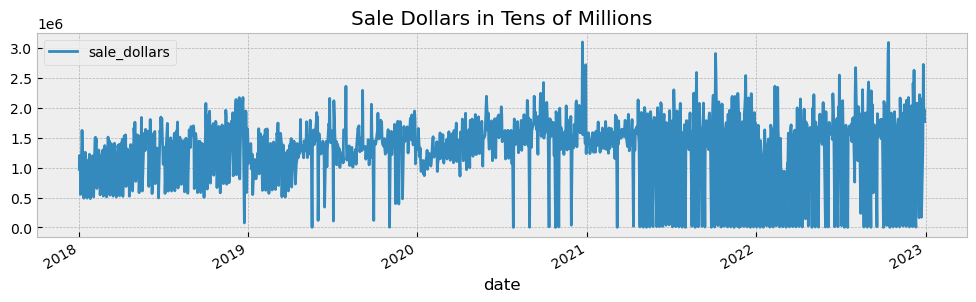

In [19]:
# Plotting raw grouped data

liquor_data_grouped_day.plot(figsize=(12,3));
plt.title('Sale Dollars in Tens of Millions');

ANALYSIS   
Because the data is daily, there's a lot of up and down fluctuation, but overall I'm not seeing a large trend one way or the other. The data is closer to stationarity than I was expecting, and there isn't as much of a dip in 2020 as I was expecting to see. I'm going to proceed with data smoothing to iron out some of that extra noise from the daily data collection. 

### DATA SMOOTHING

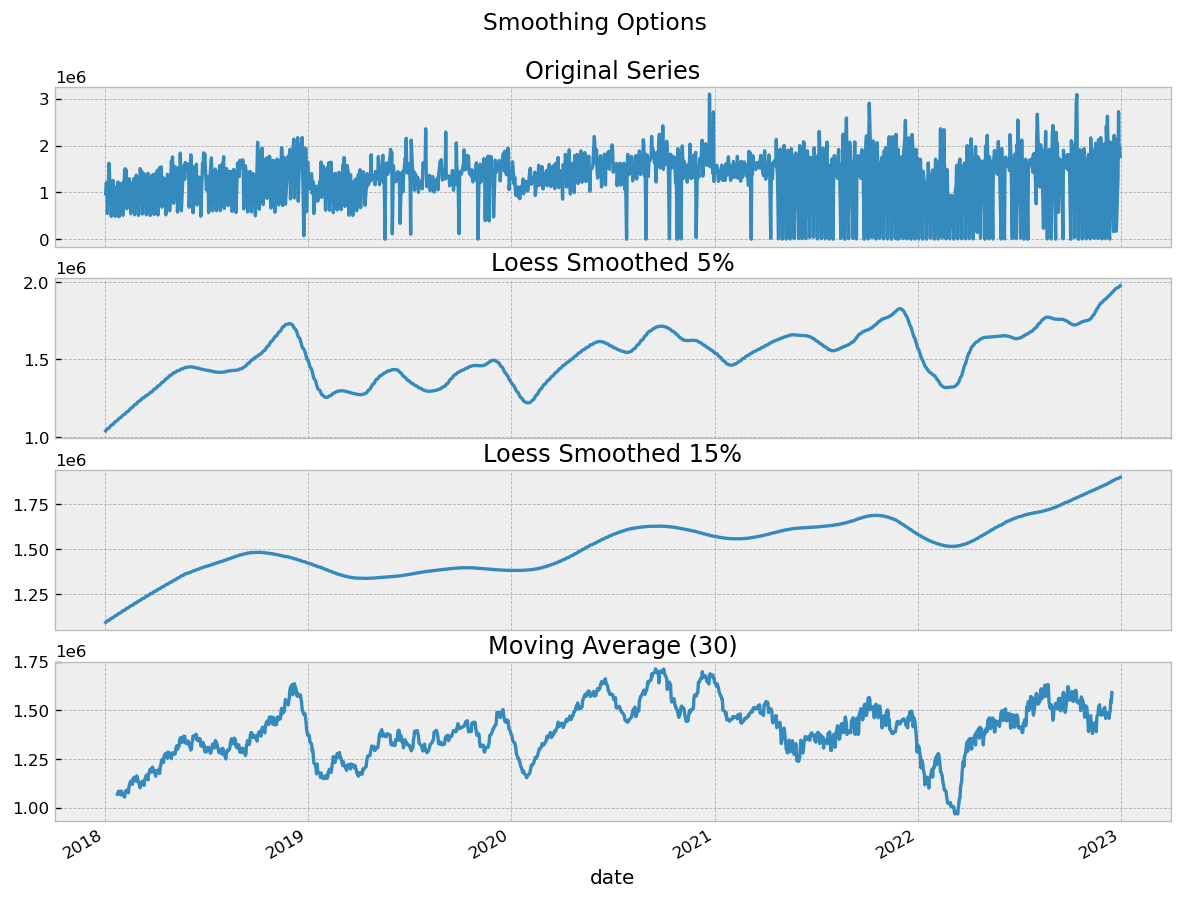

In [20]:
# Data smoothing

from statsmodels.nonparametric.smoothers_lowess import lowess
plt.rcParams.update({'xtick.bottom' : False, 'axes.titlepad':5})

liquor_ma = liquor_data_grouped_day['sale_dollars'].rolling(30, center=True, closed='both').mean()
liquor_loess_5 = pd.DataFrame(lowess(liquor_data_grouped_day['sale_dollars'], np.arange(len(liquor_data_grouped_day['sale_dollars'])), frac=0.05)[:, 1], index=liquor_data_grouped_day.index, columns=['sale_dollars'])
liquor_loess_15 = pd.DataFrame(lowess(liquor_data_grouped_day['sale_dollars'], np.arange(len(liquor_data_grouped_day['sale_dollars'])), frac=0.15)[:, 1], index=liquor_data_grouped_day.index, columns=['sale_dollars'])

fig, axes = plt.subplots(4,1, figsize=(12, 9), sharex=True, dpi=120)
liquor_data_grouped_day['sale_dollars'].plot(ax=axes[0], title='Original Series')
liquor_loess_5['sale_dollars'].plot(ax=axes[1], title='Loess Smoothed 5%')
liquor_loess_15['sale_dollars'].plot(ax=axes[2], title='Loess Smoothed 15%')
liquor_ma.plot(ax=axes[3], title='Moving Average (30)')
fig.suptitle('Smoothing Options', y=0.95, fontsize=14)
plt.show()

ANALYSIS   
The moving average alone gives the best look at how the data is really moving without all that extra stuff in there. One surprising thing is that the dip in 2022 is larger than any dip in 2020, and 2020 actually looks to be a high point of sales.   

Given these, I'll use the Loess Smoothed 5% for the decomposition. 

### DECOMPOSITION

In [21]:
# Time-series analysis: Decomposition

decomposition = sm.tsa.seasonal_decompose(liquor_loess_5, model='additive', period=30)

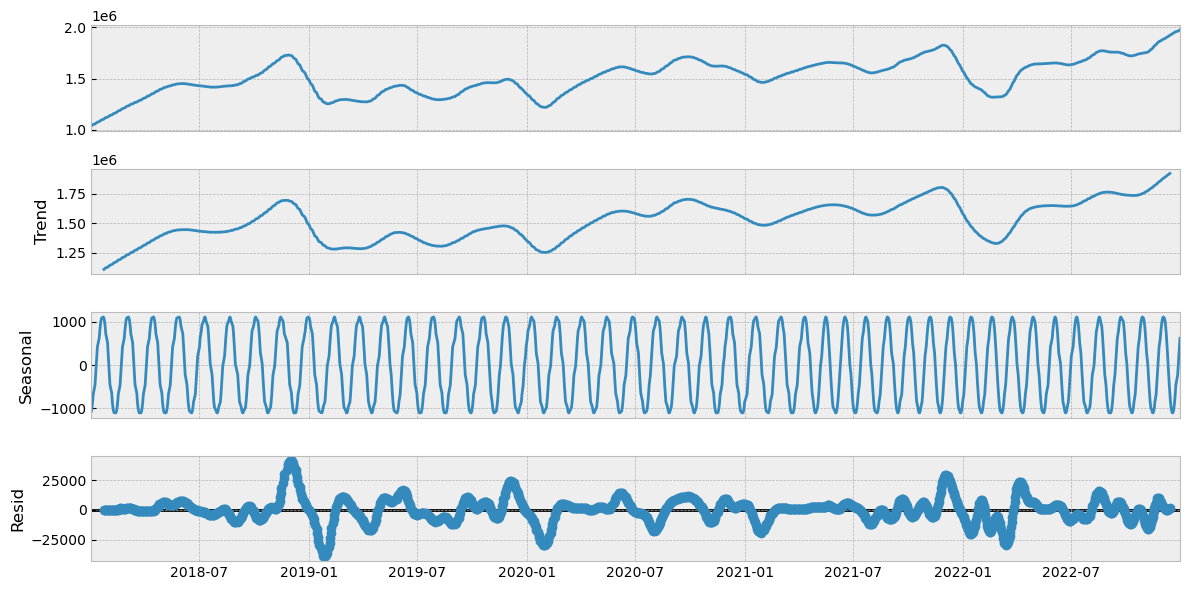

In [22]:
plt.rc("figure",figsize=(12,6))
decomposition.plot()
fig.tight_layout()
plt.show()

ANALYSIS   
The bottom graph is most interesting to me - here I can see that there's a big buy in alcohol right at the end of the year (Thanksgiving, Christmas, New Year's), followed by a big sales dip in January/February. Much less of a dip OR a spike in 2020 and 2021, with the pattern getting back to normal a  little more at the end of 2021, but still muted at the end of 2022.   

For the rolling statistics, I'm going to plot using the raw data.   

### STATIONARITY: ROLLING STATISTICS

In [23]:
# Plotting rolling statistics

liquor_data_grouped_day['z_data'] = (liquor_data_grouped_day['sale_dollars'] - liquor_data_grouped_day['sale_dollars'].rolling(window=30).mean()) / liquor_data_grouped_day['sale_dollars'].rolling(window=30).std()
liquor_data_grouped_day['zp_data'] = liquor_data_grouped_day['z_data'] - liquor_data_grouped_day['z_data'].shift(30)

In [24]:
liquor_data_grouped_day.head()

,sale_dollars,z_data,zp_data
date,,,
2018-01-02,971601.54,NaN,NaN
2018-01-03,1203749.02,NaN,NaN
2018-01-04,1124619.32,NaN,NaN
2018-01-05,551381.03,NaN,NaN
2018-01-08,1621213.23,NaN,NaN


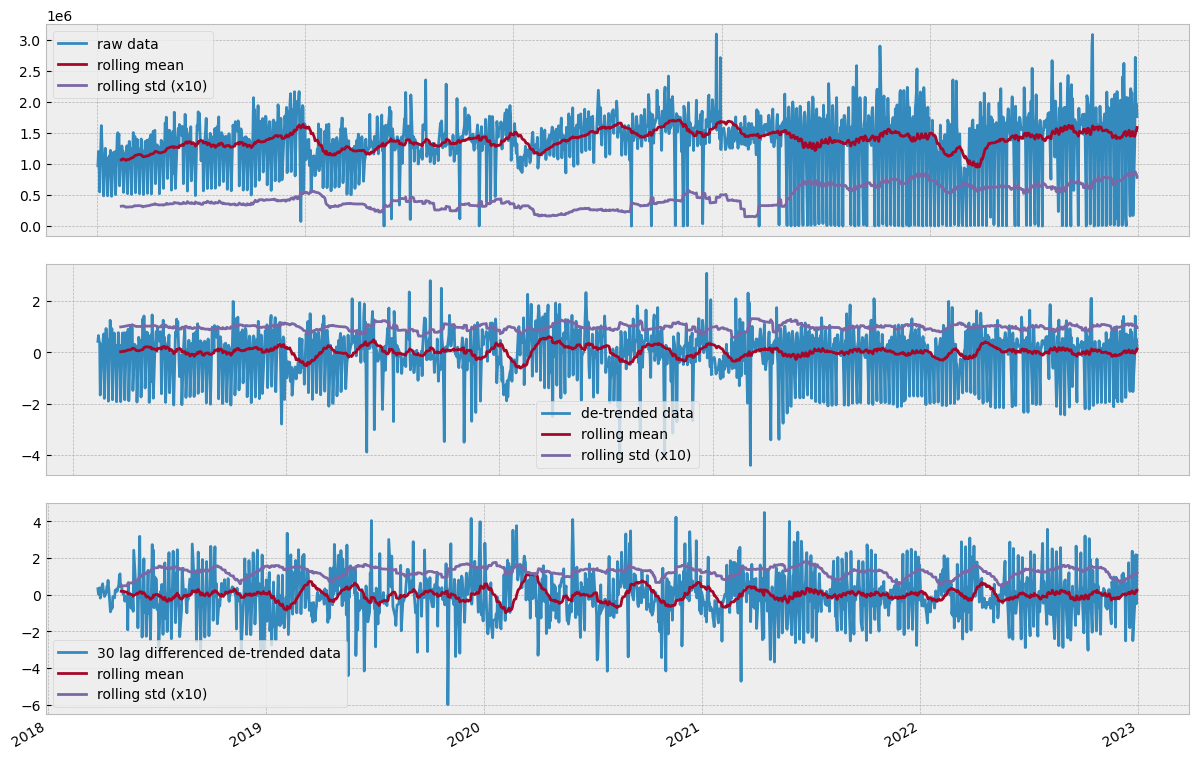

In [25]:
fig, ax = plt.subplots(3,figsize=(12, 9))
ax[0].plot(liquor_data_grouped_day.index, liquor_data_grouped_day['sale_dollars'], label='raw data')
ax[0].plot(liquor_data_grouped_day['sale_dollars'].rolling(window=30).mean(), label="rolling mean");
ax[0].plot(liquor_data_grouped_day['sale_dollars'].rolling(window=30).std(), label="rolling std (x10)");
ax[0].legend()

ax[1].plot(liquor_data_grouped_day.index, liquor_data_grouped_day['z_data'], label="de-trended data")
ax[1].plot(liquor_data_grouped_day['z_data'].rolling(window=30).mean(), label="rolling mean");
ax[1].plot(liquor_data_grouped_day['z_data'].rolling(window=30).std(), label="rolling std (x10)");
ax[1].legend()

ax[2].plot(liquor_data_grouped_day.index, liquor_data_grouped_day['zp_data'], label="30 lag differenced de-trended data")
ax[2].plot(liquor_data_grouped_day['zp_data'].rolling(window=30).mean(), label="rolling mean");
ax[2].plot(liquor_data_grouped_day['zp_data'].rolling(window=30).std(), label="rolling std (x10)");
ax[2].legend()

plt.tight_layout()
fig.autofmt_xdate()

ANALYSIS   
I would say that the data looks more stationary than I was expecting, though this may be a bit of an illusion given the upward trend after 2020. There are some dips here and there, but the rolling mean doesn't have nearly as much movement as I was thinking it was going to have. 

### STATIONARITY: DICKEY-FULLER

In [26]:
# Running Dickey-Fuller test

from statsmodels.tsa.stattools import adfuller

print(" > Is the data stationary ?")
dftest = adfuller(liquor_data_grouped_day['sale_dollars'], autolag='AIC')
print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")
for k, v in dftest[4].items():
    print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))
    
print("\n > Is the de-trended data stationary ?")
dftest = adfuller(liquor_data_grouped_day['z_data'].dropna(), autolag='AIC')
print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")
for k, v in dftest[4].items():
    print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))
    
print("\n > Is the 12-lag differenced de-trended data stationary ?")
dftest = adfuller(liquor_data_grouped_day['zp_data'].dropna(), autolag='AIC')
print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")
for k, v in dftest[4].items():
    print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))

 > Is the data stationary ?
Test statistic = -5.341
P-value = 0.000
Critical values :
	1%: -3.4351427007691138 - The data is  stationary with 99% confidence
	5%: -2.863656619400241 - The data is  stationary with 95% confidence
	10%: -2.56789688724555 - The data is  stationary with 90% confidence

 > Is the de-trended data stationary ?
Test statistic = -9.337
P-value = 0.000
Critical values :
	1%: -3.4352394560472033 - The data is  stationary with 99% confidence
	5%: -2.863699314925706 - The data is  stationary with 95% confidence
	10%: -2.567919624081087 - The data is  stationary with 90% confidence

 > Is the 12-lag differenced de-trended data stationary ?
Test statistic = -9.143
P-value = 0.000
Critical values :
	1%: -3.435336393256612 - The data is  stationary with 99% confidence
	5%: -2.863742089354917 - The data is  stationary with 95% confidence
	10%: -2.5679424031562683 - The data is  stationary with 90% confidence


ANALYSIS   
The results of the Dickey-Fuller test show that the raw data can be considered stationary (I expected that the de-trended and differenced data would be stationary). 

### STATIONARITY: AUTOCORRELATION

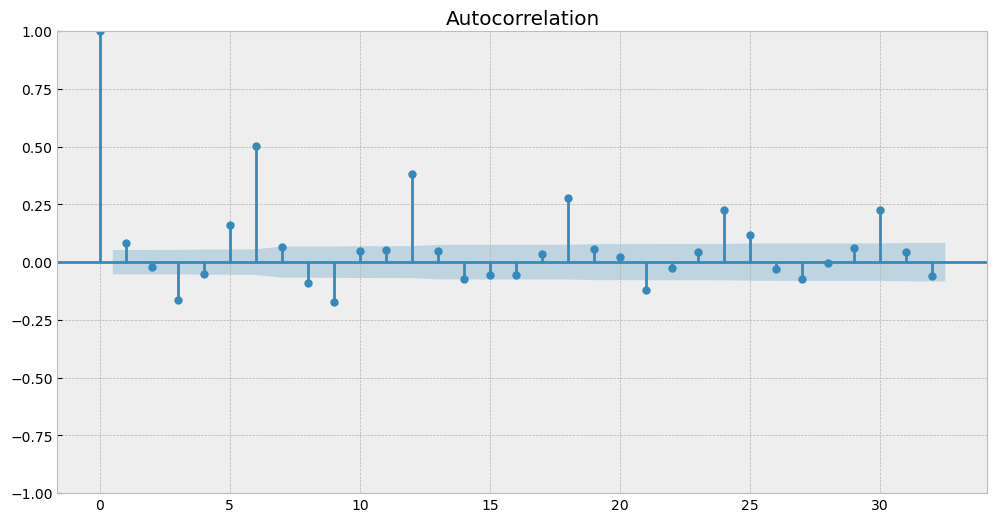

In [27]:
# Autocorrelation graph

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

plot_acf(liquor_data_grouped_day['sale_dollars'])
plt.show()

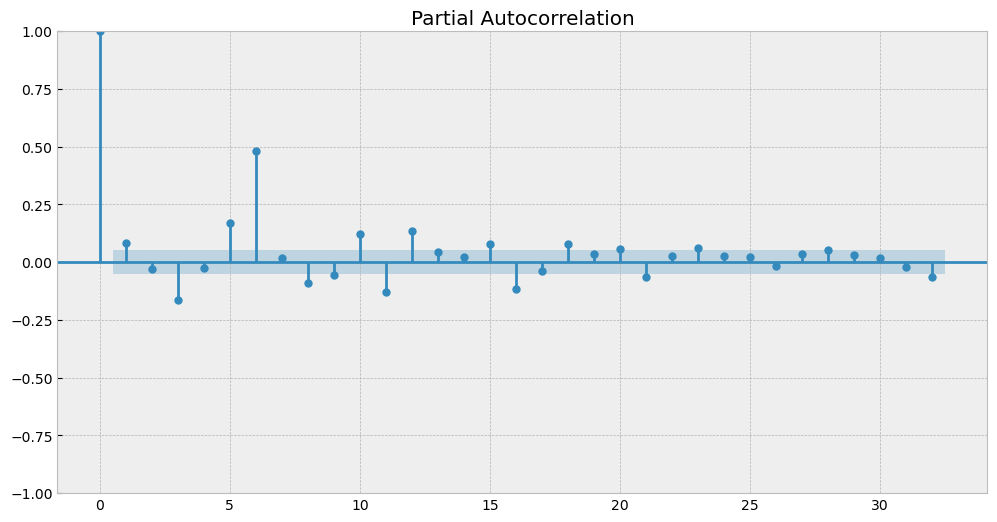

In [28]:
plot_pacf(liquor_data_grouped_day['sale_dollars'])
plt.show()

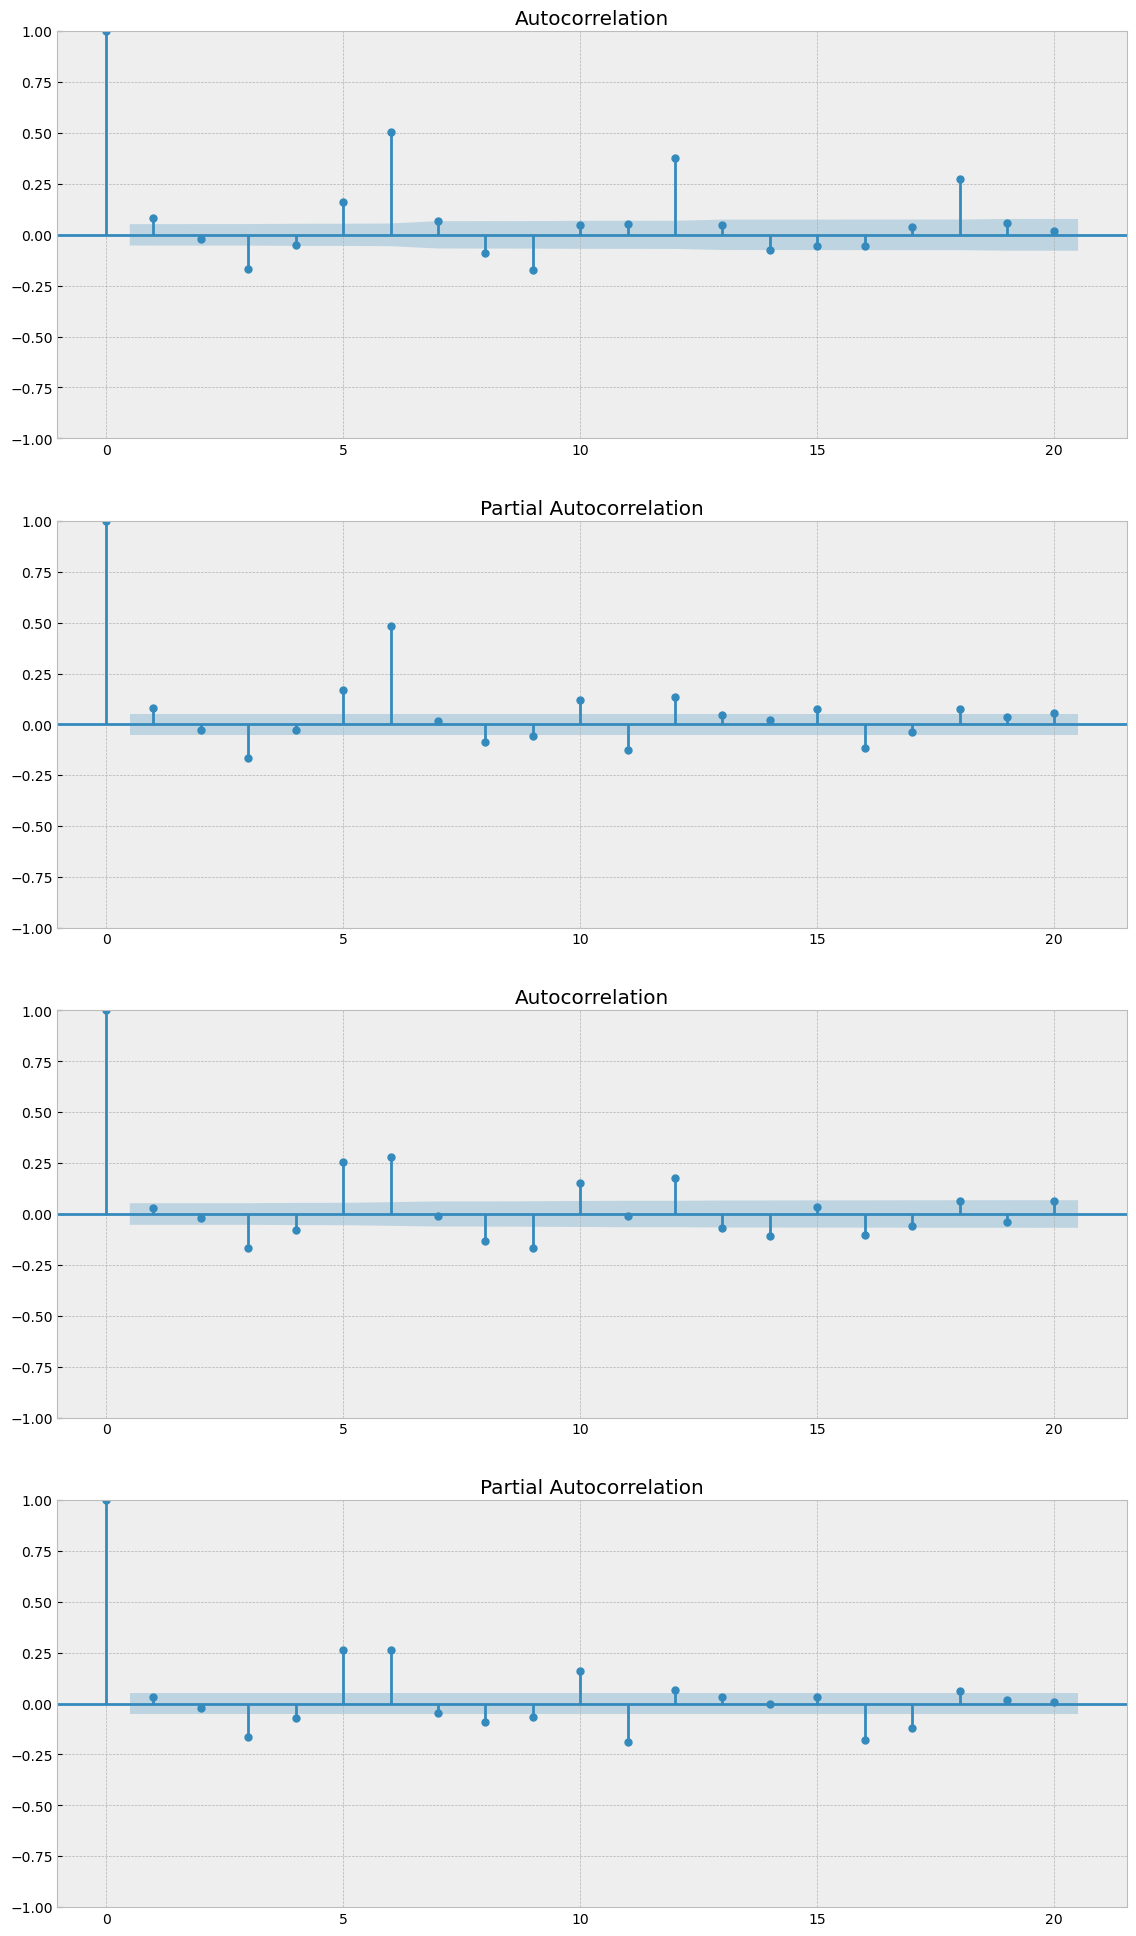

In [29]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(4, figsize=(12,20))
ax[0] = plot_acf(liquor_data_grouped_day['sale_dollars'].dropna(), ax=ax[0], lags=20)
ax[1] = plot_pacf(liquor_data_grouped_day['sale_dollars'].dropna(), ax=ax[1], lags=20)
ax[2] = plot_acf(liquor_data_grouped_day['z_data'].dropna(), ax=ax[2], lags=20)
ax[3] = plot_pacf(liquor_data_grouped_day['z_data'].dropna(), ax=ax[3], lags=20)

fig.tight_layout(pad=3.0)

ANALYSIS   
I ran the autocorrelation test on both the raw data and the de-trended data, and they look similar. There are more points above the confidence interval than I'd like, but there are still only what I would term seven SIGNIFICANT spikes outside of the confidence interval in the raw data, and 8 in the de-trended data. Taking that into account with the original rolling statistics graph and the results of the Dickey-Fuller test, I would say that I'm still generally confident in proceeding with this data.   

I'm still going to run the differencing to see if I see a difference with the autocorrelation, however. 

### DIFFERENCING & RE-TESTING

In [30]:
# Differencing the time-series data

liquor_data_grouped_diff = liquor_data_grouped_day - liquor_data_grouped_day.shift(1)

In [31]:
liquor_data_grouped_diff = liquor_data_grouped_diff.drop(columns=['z_data', 'zp_data'])

In [32]:
liquor_data_grouped_diff.isnull().sum()

sale_dollars    1
dtype: int64

In [33]:
liquor_data_grouped_diff.shape

(1390, 1)

In [34]:
liquor_data_grouped_diff = liquor_data_grouped_diff.dropna()

In [35]:
liquor_data_grouped_diff.shape

(1389, 1)

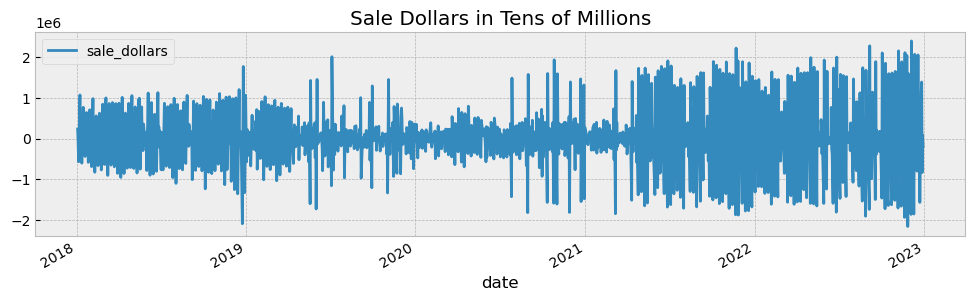

In [36]:
liquor_data_grouped_diff.plot(figsize=(12,3));
plt.title('Sale Dollars in Tens of Millions');

ANALYSIS   
The shape is still generally the same as the raw data, but the ups and downs have been evened out, especially in the beginning. While I don't feel that there's much of change trend or shape-wise, the way this one is laid out is a little clearer than the raw data. 

In [37]:
# Running Dickey-Fuller test on differenced data

print(" > Is the data stationary ?")
dftest = adfuller(liquor_data_grouped_diff['sale_dollars'], autolag='AIC')
print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")
for k, v in dftest[4].items():
    print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))

 > Is the data stationary ?
Test statistic = -12.407
P-value = 0.000
Critical values :
	1%: -3.4351497363134746 - The data is  stationary with 99% confidence
	5%: -2.863659724044779 - The data is  stationary with 95% confidence
	10%: -2.567898540568101 - The data is  stationary with 90% confidence


ANALYSIS   
While the raw data was already below the 99% confidence level (raw data was at -5), the differenced data is even lower than that, nearly reaching the point of the de-trended differenced data calculated for the rolling statistics graphs. 

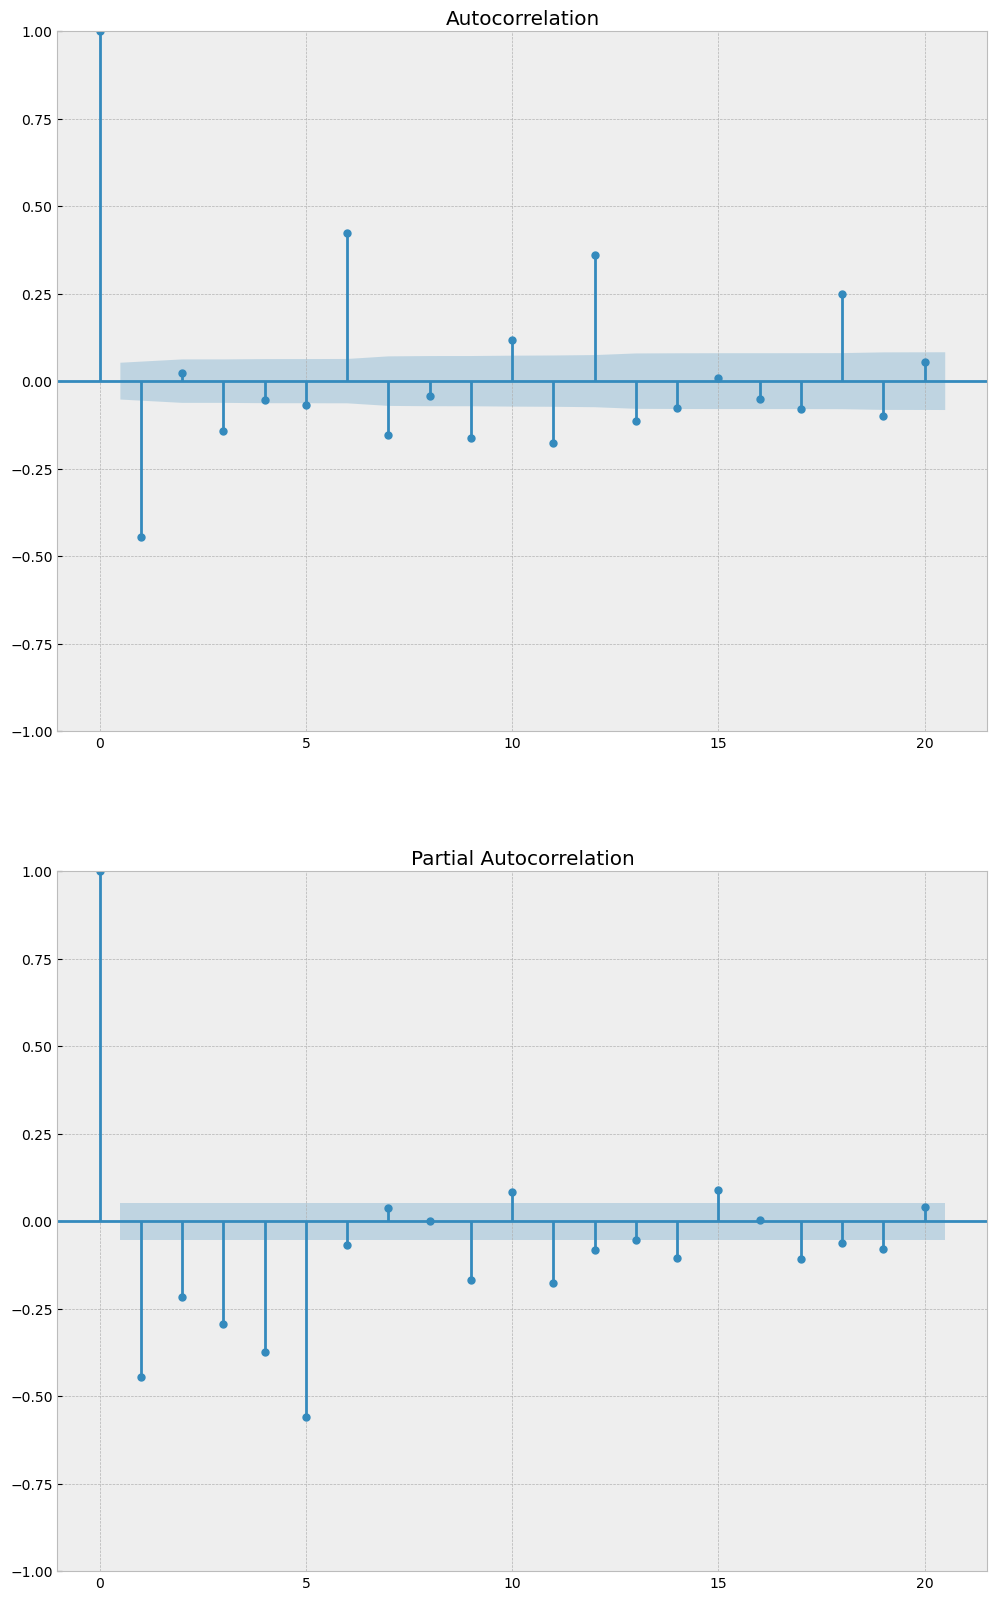

In [38]:
# Autocorrelation of differenced data 

fig, ax = plt.subplots(2, figsize=(12,20))
ax[0] = plot_acf(liquor_data_grouped_diff['sale_dollars'].dropna(), ax=ax[0], lags=20)
ax[1] = plot_pacf(liquor_data_grouped_diff['sale_dollars'].dropna(), ax=ax[1], lags=20)

ANALYSIS   
Even with the differenced data, there are spikes outside the blue area - nine by this count, which is two more than I counted for the raw data. Given this, I am still confident in proceeding with the raw data. 